In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder


In [235]:
df=pd.read_csv("EasyVisa.csv")
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [236]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [238]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [239]:
[f"{column} unique values:  {df[column].nunique()}" for column in df.columns]

['case_id unique values:  25480',
 'continent unique values:  6',
 'education_of_employee unique values:  4',
 'has_job_experience unique values:  2',
 'requires_job_training unique values:  2',
 'no_of_employees unique values:  7105',
 'yr_of_estab unique values:  199',
 'region_of_employment unique values:  5',
 'prevailing_wage unique values:  25454',
 'unit_of_wage unique values:  4',
 'full_time_position unique values:  2',
 'case_status unique values:  2']

In [240]:
# importing date class from datetime module
from datetime import date

# creating the date object of today's date
todays_date = date.today()
current_year= todays_date.year
df['company_age'] = current_year-df['yr_of_estab']
df.drop('yr_of_estab', inplace=True, axis=1)


In [241]:
#df['company_age'] = current_year-df['yr_of_estab']
#df.drop('yr_of_estab', inplace=True, axis=1)

In [242]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,EZYV01,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,18
1,EZYV02,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,23
2,EZYV03,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,17
3,EZYV04,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,128
4,EZYV05,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,20


<Axes: xlabel='case_status', ylabel='full_time_position'>

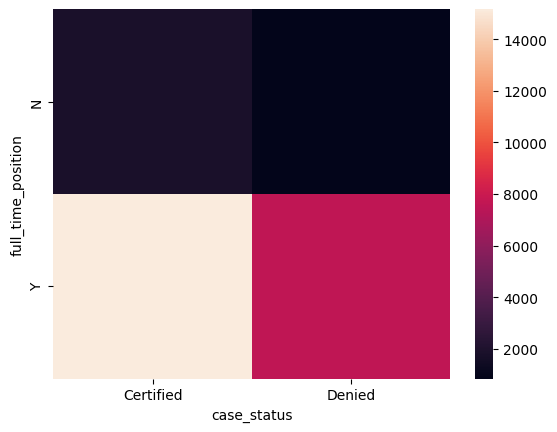

In [243]:
sns.heatmap(pd.crosstab(df['full_time_position'],df['case_status'])) 
# issey hume ye pata chla k jo log full time positin k liye apply kar rhe hai unke maximum chance hai accept hone ke

In [244]:
#Here we check that data is imbalanced or not it means we are checking that the output columns have very fluctuating 
#values or not because if the data is train on a labelleb in which one response occuring lot of times and another one is occuring few times so this cause unwanted result or bad accuracy 
df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [245]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,EZYV01,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,18
1,EZYV02,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,23
2,EZYV03,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,17
3,EZYV04,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,128
4,EZYV05,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,20


In [246]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,EZYV01,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,18
1,EZYV02,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,23
2,EZYV03,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,17
3,EZYV04,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,128
4,EZYV05,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,20


In [247]:
# Check the percentage of each class
print(df['case_status'].value_counts(normalize=True) * 100)

case_status
Certified    66.789639
Denied       33.210361
Name: proportion, dtype: float64


In [248]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,EZYV01,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,18
1,EZYV02,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,23
2,EZYV03,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,17
3,EZYV04,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,128
4,EZYV05,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,20


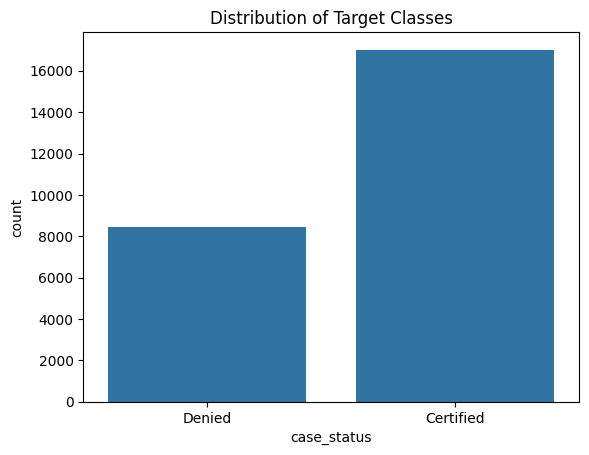

In [249]:
# Create a count plot using seaborn
sns.countplot(x='case_status', data=df)
plt.title('Distribution of Target Classes')
plt.show()

In [250]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,EZYV01,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,18
1,EZYV02,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,23
2,EZYV03,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,17
3,EZYV04,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,128
4,EZYV05,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,20


Har continent se aayi applications ki ginti:
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64


C:\Users\anura\AppData\Local\Temp\ipykernel_2592\2168088791.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=continent_counts.index, y=continent_counts.values, palette='viridis')


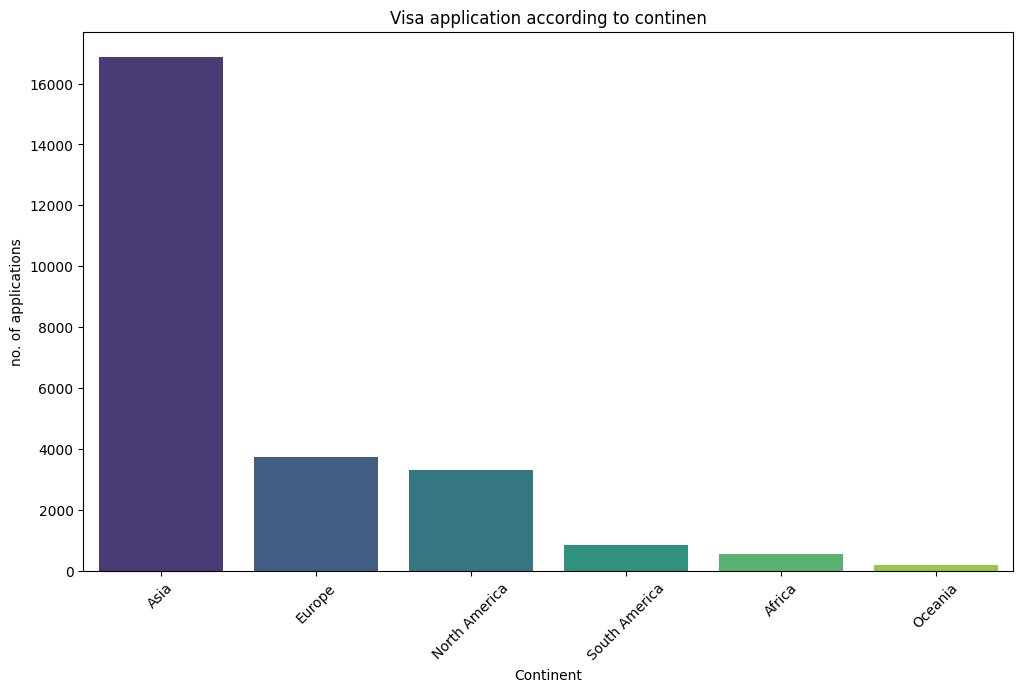

In [251]:



# Har continent se kitni applications hain, woh count karna
continent_counts = df['continent'].value_counts()
print("Har continent se aayi applications ki ginti:")
print(continent_counts)

# Bar Chart
plt.figure(figsize=(12, 7))
sns.barplot(x=continent_counts.index, y=continent_counts.values, palette='viridis')
plt.xlabel('Continent')
plt.ylabel('no. of applications')
plt.title('Visa application according to continen')
plt.xticks(rotation=45)
plt.show()


Continent ke hisab se Visa Status (Certified vs Denied):
case_status    Certified  Denied
continent                       
Africa               397     154
Asia               11012    5849
Europe              2957     775
North America       2037    1255
Oceania              122      70
South America        493     359


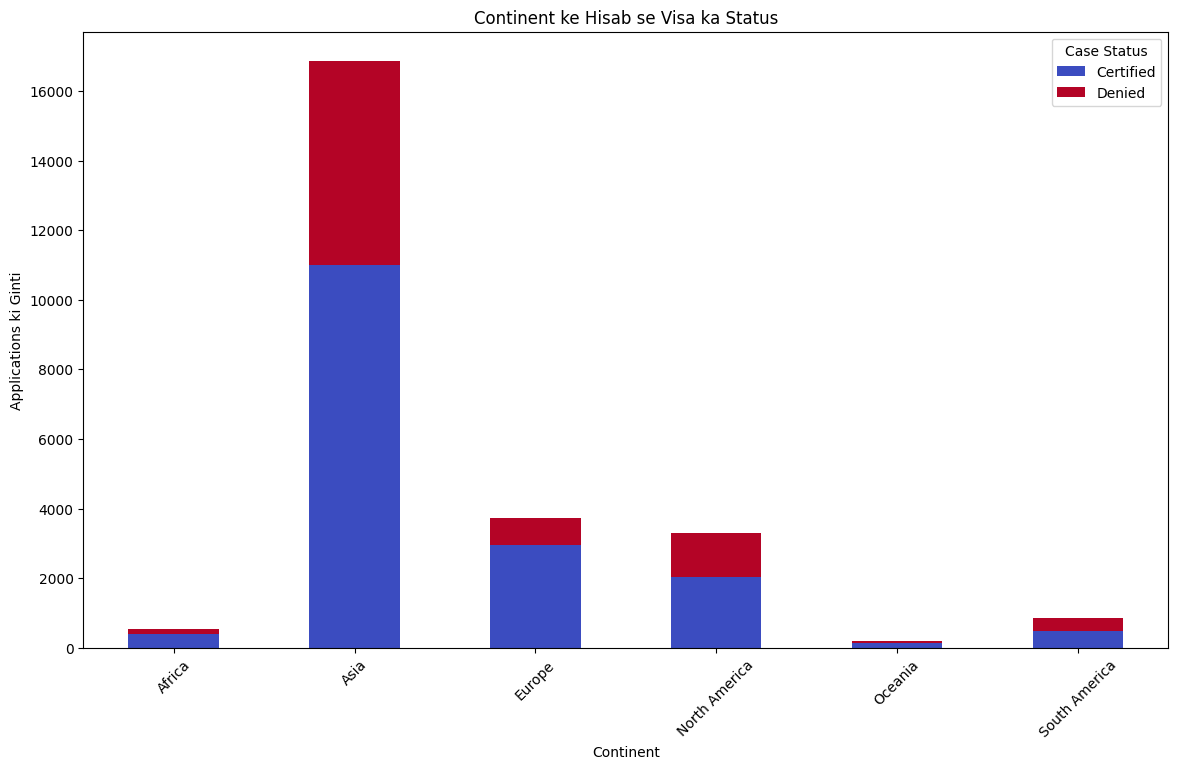

In [252]:
# Continent aur case_status ke beech kya relation hai, woh dekhna
continent_status_counts = df.groupby('continent')['case_status'].value_counts().unstack().fillna(0)

print("\nContinent ke hisab se Visa Status (Certified vs Denied):")
print(continent_status_counts)


# Iska ek stacked bar chart banana
continent_status_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='coolwarm')
plt.xlabel('Continent')
plt.ylabel('Applications ki Ginti')
plt.title('Continent ke Hisab se Visa ka Status')
plt.xticks(rotation=45)
plt.legend(title='Case Status')
plt.show()

In [253]:
# Education ke hisaab se success rate nikalna
df[df['continent'] == 'Asia'].groupby('education_of_employee')['case_status'].value_counts(normalize=True)

education_of_employee  case_status
Bachelor's             Certified      0.614816
                       Denied         0.385184
Doctorate              Certified      0.845070
                       Denied         0.154930
High School            Denied         0.704803
                       Certified      0.295197
Master's               Certified      0.794599
                       Denied         0.205401
Name: proportion, dtype: float64

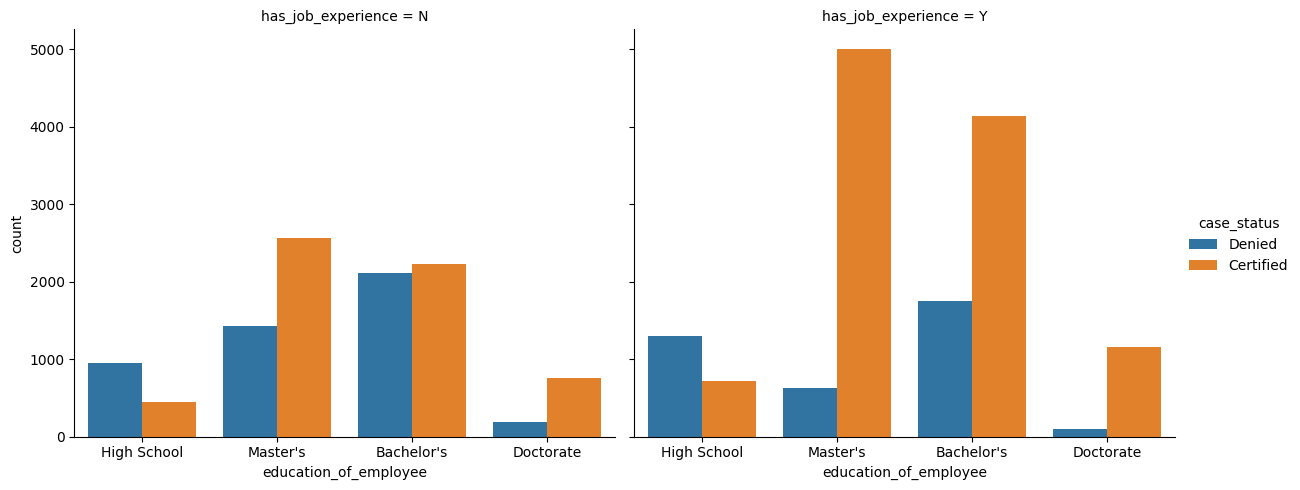

In [254]:
sns.catplot(x="education_of_employee",hue="case_status",col="has_job_experience",data=df,kind="count",height=5,aspect=1.2)
plt.show()

In [255]:

# Now split into X and y
X = df.drop('case_status', axis=1)
y = df['case_status']

# ...existing code...

In [256]:
# If the target column has Denied it is encoded as 1 others as 0
y= np.where(y=='Denied', 1,0)

In [257]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,EZYV01,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,18
1,EZYV02,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,23
2,EZYV03,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,17
3,EZYV04,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,128
4,EZYV05,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,20


In [258]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O' ]
num_feature

['no_of_employees', 'prevailing_wage', 'company_age']

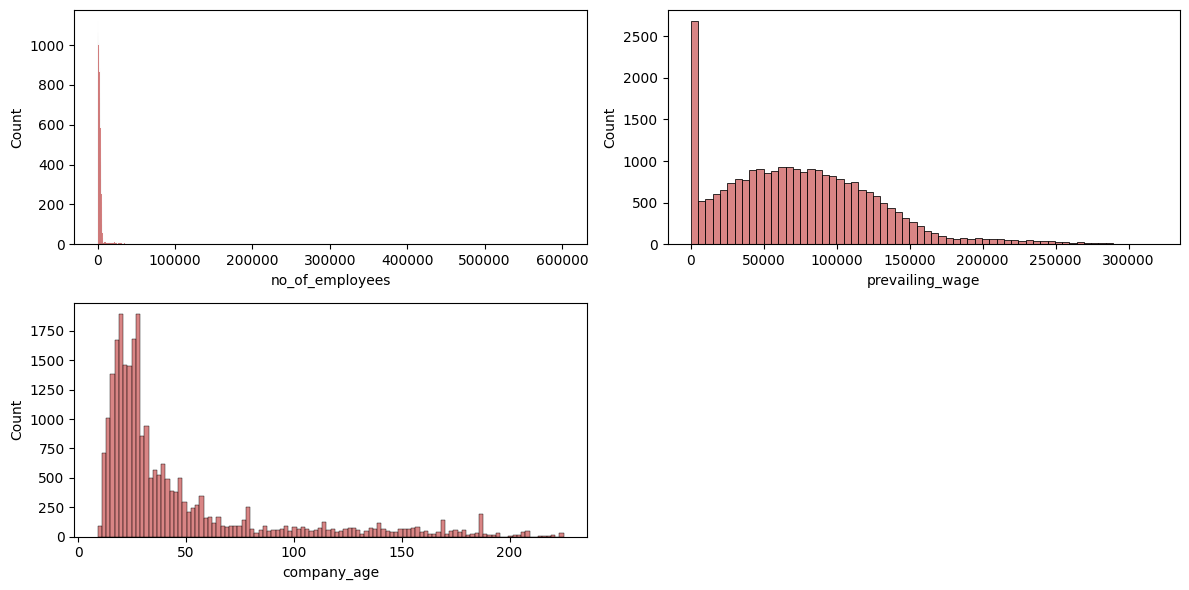

In [259]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [260]:
df[num_feature].head()

,no_of_employees,prevailing_wage,company_age
0,14513,592.2029,18
1,2412,83425.6500,23
2,44444,122996.8600,17
3,98,83434.0300,128
4,1082,149907.3900,20


In [261]:
X[num_feature].skew(axis=0,skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

- Positiviely Skewed : company_age, no_of_employees.
- We can handle outliers and then check the skewness.

## Apply Power Transformer to Check if it can reduces the outliers

In [262]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features =['company_age', 'no_of_employees']
X_copy=pt.fit_transform(X[transform_features])

In [263]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

In [264]:
X_copy.head()

,company_age,no_of_employees
0,-0.955551,1.517300
1,-0.467001,0.030912
2,-1.078363,2.885076
3,1.630914,-1.343550
4,-0.738126,-0.432287


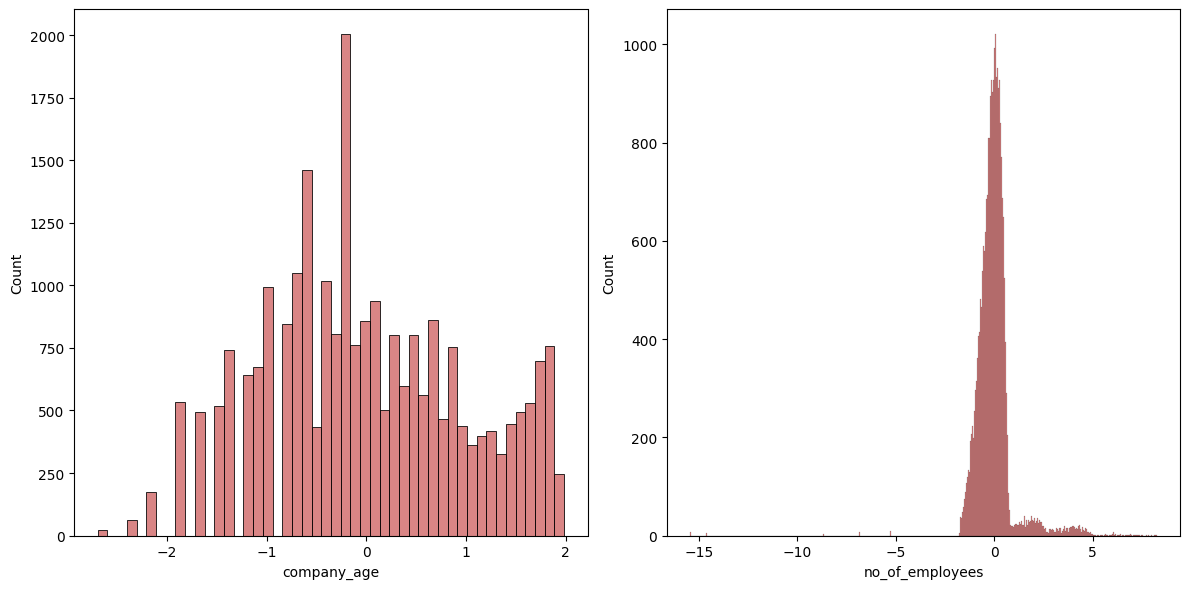

In [265]:
plt.figure(figsize=(12,6))
for i, col in enumerate(transform_features):
    plt.subplot(1,2,i+1)
    sns.histplot(x=X_copy[col],color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

**Checking Skewness**

In [266]:
X_copy.skew()

company_age        0.112260
no_of_employees    0.399339
dtype: float64

- Here Yeo-Johnson is used and it supports both positive or negative data for transformation.
- So Power Transformer with yeo-johnson can be used.

***Feature Encoding and Scaling***

 **One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**Ordinal Encoding for Columns which has many unique categories**
* Ordinal encoding is used here as label encoder is supported for column transformer.
* Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

**Standard Scaler**
* Standardize features by removing the mean and scaling to unit variance.

**Power Transformer**
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

**Selecting numerical features for preprocessing**

In [267]:
num_feature =list(X.select_dtypes(exclude='object').columns)

In [268]:
num_feature

['no_of_employees', 'prevailing_wage', 'company_age']

**Preprocessing using column transformer**

In [269]:
or_columns = ['has_job_experience','requires_job_training','full_time_position','education_of_employee']
oh_columns = ['continent','unit_of_wage','region_of_employment']
transform_columns= ['no_of_employees','company_age']

In [270]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [271]:
numeric_transformer  = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
  ])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_feature)
    ]
)

In [272]:
X = preprocessor.fit_transform(X)
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]], shape=(25480, 24))

In [273]:
from imblearn.combine import SMOTETomek, SMOTEENN
smt = SMOTEENN(random_state=42, sampling_strategy='minority')
#fit the model to genearate the data
X_res, y_res = smt.fit_resample(X, y)

In [274]:

from sklearn.model_selection import  train_test_split

# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((13629, 24), (3408, 24))

In [275]:
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

In [276]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
def evaluate_clf(true, predicted):
    #the positive label we want to track is "certified"
    positive_label='Certified'
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [277]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [278]:
# Create a function which can evaluate models and return a report
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    models_list = []
    accuracy_list = []
    auc= []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')

    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)

    return report

In [279]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9533
- F1 score: 0.9571
- Precision: 0.9512
- Recall: 0.9630
- Roc Auc Score: 0.9525


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9269
- F1 score: 0.9327
- Precision: 0.9279
- Recall: 0.9375
- Roc Auc Score: 0.9260


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8897
- F1 score: 0.8965
- Precision: 0.9068
- Recall: 0.8865
- Roc Auc Score: 0.8900
----------------------------------
Model performance for Test set
- Accuracy: 0.8791
- F1 score: 0.8875
- Precision: 0.8919
- Recall: 0.8832
- Roc Auc Score: 0.8788


Logistic Regression
Model performance for Training 

**Result of all models**

In [280]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.953345
4,K-Neighbors Classifier,0.941608
5,XGBClassifier,0.935153
6,CatBoosting Classifier,0.928110
1,Decision Tree,0.926937
2,Gradient Boosting,0.879108
7,Support Vector Classifier,0.857101
8,AdaBoost Classifier,0.849178
3,Logistic Regression,0.725646


**Here we can use Random Forest for Hyper Parameter Tuning**

**Define the parameter distribution for Random forest**

In [281]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [282]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

**Create a function for model training and report which can be used in hyperparameter tuning loop**

In [283]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits


e:\anacondA\envs\vehicle\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
e:\anacondA\envs\vehicle\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 60 candidates, totalling 180 fits


e:\anacondA\envs\vehicle\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 9}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}


## Retraining the Model with best Parameters

In [284]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9501
- F1 score: 0.9542
- Precision: 0.9470
- Recall: 0.9614
- Roc Auc Score: 0.9491


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9683
- F1 score: 0.9711
- Precision: 0.9577
- Recall: 0.9848
- Roc Auc Score: 0.9669


XGBClassifier
Model performance for Training set
- Accuracy: 0.9993
- F1 score: 0.9993
- Precision: 0.9986
- Recall: 1.0000
- Roc Auc Score: 0.9992
----------------------------------
Model performance for Test set
- Accuracy: 0.9457
- F1 score: 0.9499
- Precision: 0.9475
- Recall: 0.9522
- Roc Auc Score: 0.9452




In [285]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.968310
0,Random Forest Classifier,0.950117
2,XGBClassifier,0.945716


In [286]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9683
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1568
           1       0.96      0.98      0.97      1840

    accuracy                           0.97      3408
   macro avg       0.97      0.97      0.97      3408
weighted avg       0.97      0.97      0.97      3408



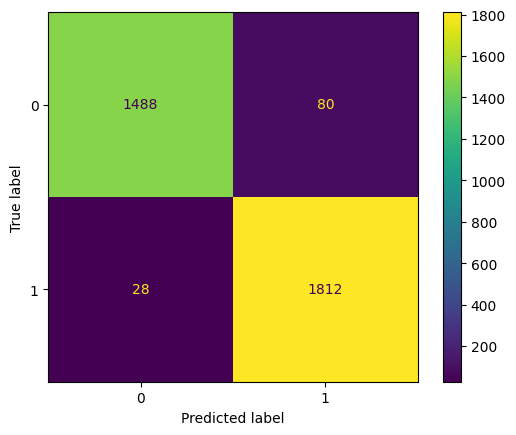

In [287]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

## Best model is K-nearest neighbor(KNN) with accuracy 96.66%